In [ ]:
from google.colab import drive
drive.mount('/content/drive')#Mount the drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import pandas and numpy
import pandas as pd
import numpy as np
import joblib
# Import warnings
import warnings
warnings.filterwarnings('ignore')
!pip install plotly
import plotly.graph_objects as go
import plotly.express as px
from sklearn.metrics import mean_squared_error
import datetime
from sklearn.metrics import r2_score
!pip install missingno
import missingno as msno
import matplotlib.pyplot as plt
#Data Preprocessing(scaling,transforming and encoding)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.utils import to_categorical
#Model Building
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
!pip install keras-tuner
from keras_tuner import RandomSearch
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback
from keras_tuner.engine.hyperparameters import HyperParameters
from keras_tuner import RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import LearningRateScheduler, TensorBoard
import keras_tuner as kt
from sklearn.metrics import classification_report, confusion_matrix

**Data Loading and Preprocessing**

In [3]:
#Loading train and test datasets
train_df= pd.read_csv('/content/drive/My Drive/655_deep_learning/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/655_deep_learning/test.csv')

In [4]:
print("Sample of Traindataset : \n",train_df.sample(5))
print("Sample of Testdataset : \n",test_df.sample(5))
print("Shape of Train dataset :",train_df.shape)
print("Shape of Test dataset :",test_df.shape)

Sample of Traindataset : 
           ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
7826  460314  Female           No   39        No  Healthcare              4.0   
4347  460821  Female           No   31       Yes  Healthcare              NaN   
7368  464094    Male          Yes   53       Yes   Executive              1.0   
5275  461540    Male           No   38       Yes         NaN              3.0   
2004  466128    Male           No   35       Yes      Artist              4.0   

     Spending_Score  Family_Size  Var_1 Segmentation  
7826            Low          3.0  Cat_6            D  
4347            Low          2.0  Cat_4            D  
7368           High          4.0  Cat_6            B  
5275            Low          2.0  Cat_2            B  
2004            Low          2.0  Cat_6            A  
Sample of Testdataset : 
           ID  Gender Ever_Married  Age Graduated     Profession  \
1396  463689  Female          Yes   41       Yes         Doctor

**Check for missing values and handle them appropriately.**

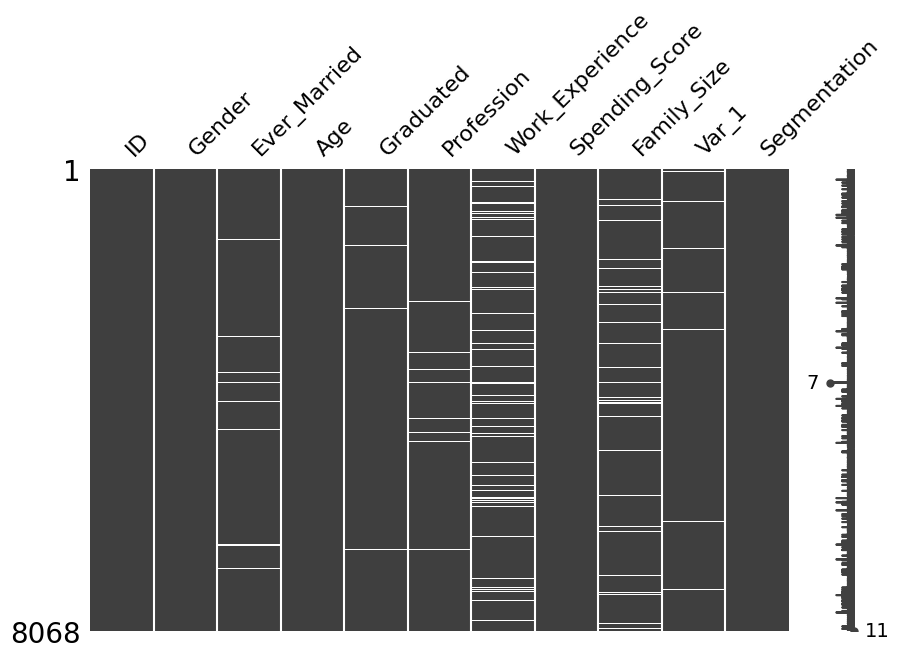

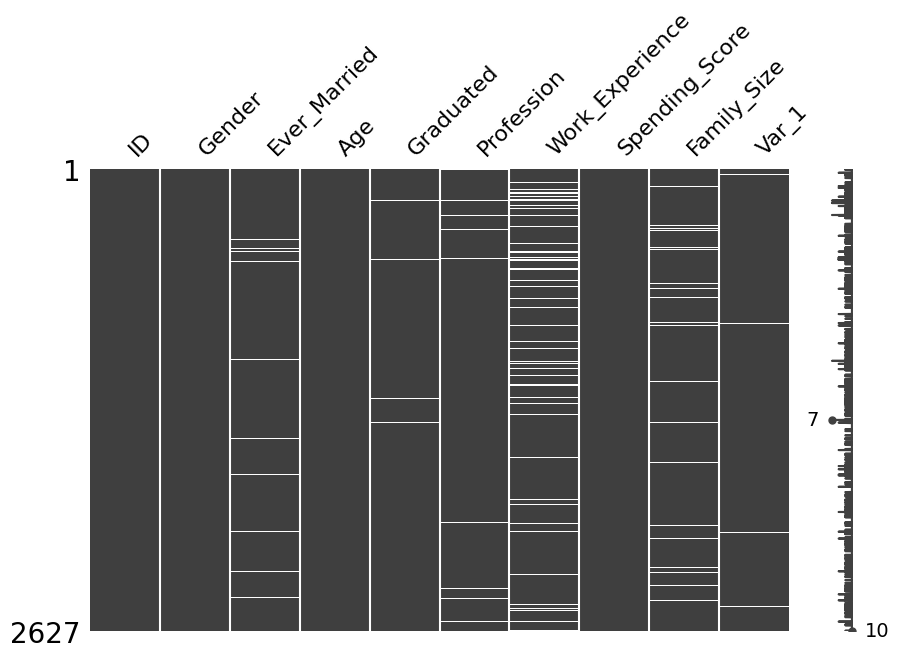

In [5]:
# Visualize missing values
msno.matrix(train_df, figsize=(10, 6))
plt.show()
msno.matrix(test_df, figsize=(10, 6))
plt.show()

# Plot distributions of numerical columns
for column in train_df.select_dtypes(include=['float64', 'int64']).columns:
    fig = px.histogram(train_df, x=column, title=f'Distribution of {column} in Train data')
    fig.show()
for column in test_df.select_dtypes(include=['float64', 'int64']).columns:
    fig = px.histogram(test_df, x=column, title=f'Distribution of {column} in Test data')
    fig.show()

In [6]:
# Copy original datasets to new variables
train_data = train_df.copy()
test_data = test_df.copy()

In [7]:
# Filling missing values for categorical variables with mode
categorical_columns = ['Gender', 'Ever_Married','Graduated','Profession','Spending_Score','Var_1']
for col in categorical_columns:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

In [8]:
# Filling missing values for numerical variables with median
numerical_columns = ['ID','Age','Work_Experience','Family_Size']

for col in numerical_columns:
    # Use median for numerical columns
    train_df[col].fillna(train_df[col].median(), inplace=True)
    test_df[col].fillna(test_df[col].median(), inplace=True)

Missing values in train data: 0
Missing values in test data: 0
Missing values in Train dataset Axes(0.125,0.11;0.698618x0.77)


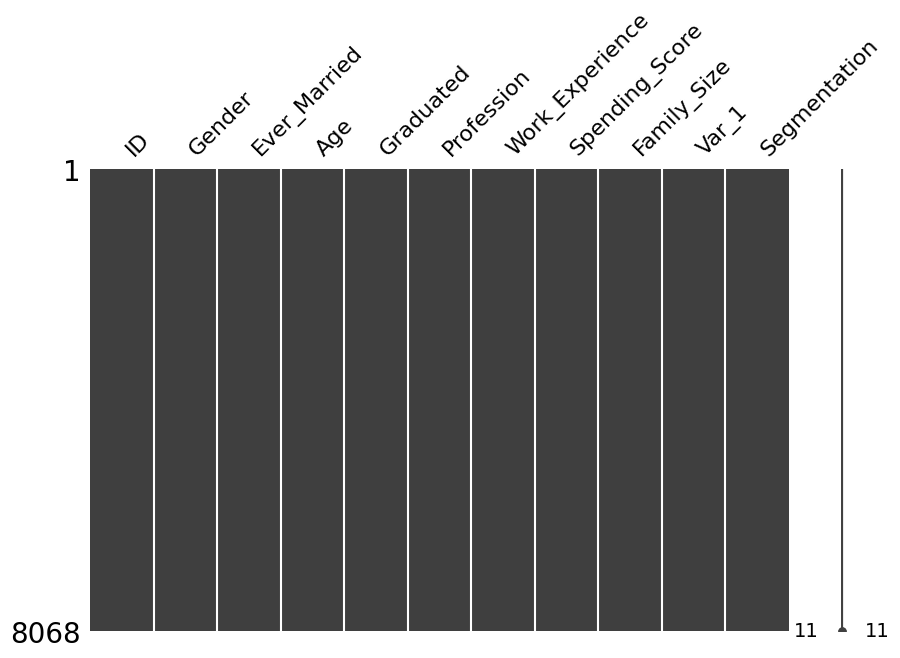

Missing values in Test dataset Axes(0.125,0.11;0.698618x0.77)


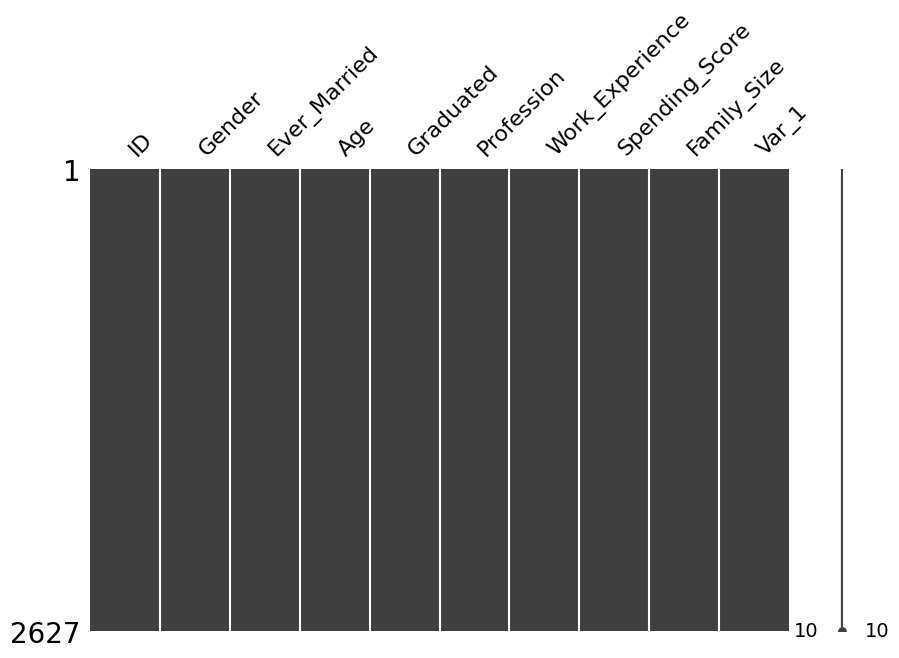

In [9]:
# Verify if missing values have been handled
print("Missing values in train data:", train_df.isnull().sum().sum())
print("Missing values in test data:", test_df.isnull().sum().sum())
# Visualize missing values after handling
print("Missing values in Train dataset",msno.matrix(train_df, figsize=(10, 6)))
plt.show()
print("Missing values in Test dataset",msno.matrix(test_df, figsize=(10, 6)))
plt.show()

 **Perform encoding on categorical variables and scaling on numerical features and Prepare the Data**

 For train.csv:

▪ Split the data into X_train (features) and y_train (target labels).

For test.csv:

▪ Prepare the features (X_test), ensuring that all preprocessing steps (scaling, encoding) applied to train.csv are replicated on test.csv.



In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

#splitting train_data into fetures X_train and target y_train
X_train = train_df.drop('Segmentation', axis=1)
y_train = train_df['Segmentation']

# Define the numerical and categorical columns
numerical_fetures = numerical_columns
categorical_features = categorical_columns
# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_fetures),  # Apply StandardScaler to numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Apply OneHotEncoder to categorical features
    ]
)

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)

X_test_transformed = preprocessor.fit_transform(test_df)

# Display the shape of transformed data
print("Transformed training data shape:", X_train_transformed.shape)

Transformed training data shape: (8068, 29)


In [11]:
# One-hot encode the target labels
y_train_transformed = pd.get_dummies(y_train).values

# Display the shape of the encoded labels
print("Shape of y_train_transformed:", y_train_transformed.shape)

Shape of y_train_transformed: (8068, 4)


**Model 1 - Best Practices Model**

Build a neural network model with at least two hidden layers using the ReLU
activation function.

Use softmax as the activation function for the output layer to handle multi-class classification.

Use categorical cross-entropy as the loss function and Adam optimizer.

In [12]:
model_1 = Sequential()


model_1.add(Dense(units=32, activation='relu', input_dim=X_train_transformed.shape[1]))#input_layer
model_1.add(Dense(units=16, activation='relu'))#hidden_layer-1
model_1.add(Dense(units=8, activation='relu'))#hidden-layer-2
model_1.add(Dense(units=4, activation='softmax'))#Output_layer

#compiling the model
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Model Training:**

Train the model using the train.csv data (X_train, y_train) for 50 epochs with a batch size of 32.

Use early stopping to prevent overfitting (monitor the validation loss and set a patience of 5 epochs).

Use 20% of the training data as a validation set during training

In [13]:
# Define early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model_1.fit(
    X_train_transformed,
    y_train_transformed,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1  # Display training progress
)

Epoch 1/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.3747 - loss: 1.3147 - val_accuracy: 0.4771 - val_loss: 1.1737
Epoch 2/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4922 - loss: 1.1449 - val_accuracy: 0.4981 - val_loss: 1.1213
Epoch 3/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5128 - loss: 1.0987 - val_accuracy: 0.4926 - val_loss: 1.1015
Epoch 4/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5201 - loss: 1.0807 - val_accuracy: 0.5056 - val_loss: 1.0895
Epoch 5/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5427 - loss: 1.0514 - val_accuracy: 0.5186 - val_loss: 1.0814
Epoch 6/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5448 - loss: 1.0477 - val_accuracy: 0.5149 - val_loss: 1.0817
Epoch 7/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5385 - loss: 1.0679 - val_accuracy: 0.5192 - val_loss: 1.0816
Epoch 8/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5469 - loss: 1.0416 - val_accuracy: 0

**Model Summary:**

Print the model architecture summary to review the structure.

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,982 (19.46 KB)

 Trainable params: 1,660 (6.48 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,322 (12.98 KB)

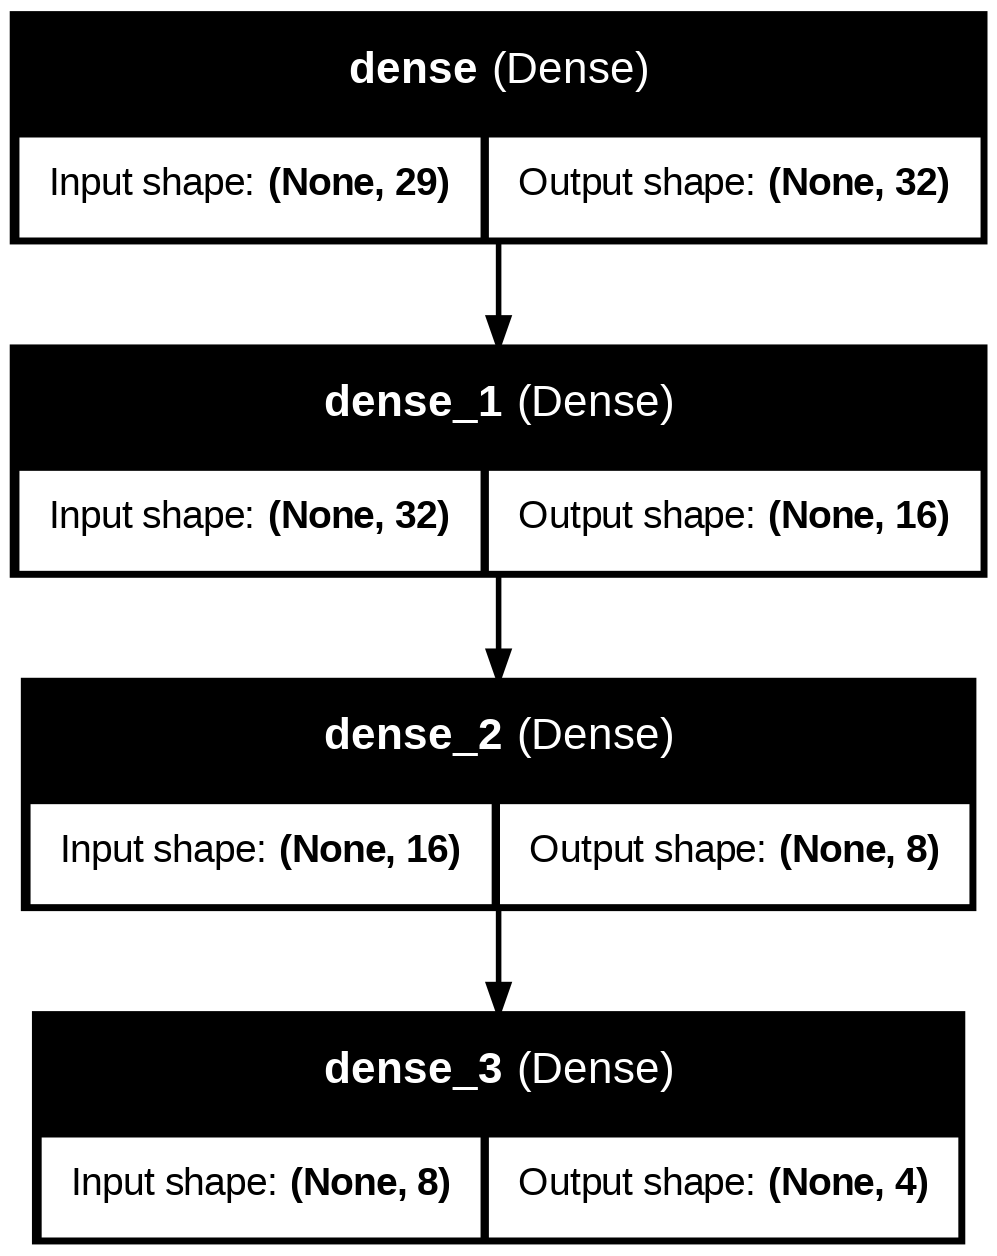

In [14]:
# Print the model architecture summary
model_1.summary()
# Show the model structure
plot_model(model_1, to_file='model_1_structure.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename='model_1_structure.png')

**Model 2 - Hyperparameter Optimization Using Keras Tuner**

Implement Keras Tuner:

Use Keras Tuner to optimize the following hyperparameters:

▪ Number of hidden layers.

▪ Number of neurons in each layer.

▪ Learning rate.

▪ Activation functions.

Set up a search space that explores different combinations of these
hyperparameters. Experiment =5

In [15]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define a function that builds the model
def build_model(hp):
    model_2 = Sequential()

    # Define the input layer based on the shape of X_train
    input_shape = X_train_transformed.shape[1]

    # Tune the number of hidden layers from 1 to 10
    for i in range(hp.Int('num_layers', 1, 10)):
        # Tune the number of units in each layer
        model_2.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
                        activation='relu'))  # We are only using 'relu' as specified


    # Output layer for multi-class classification
    model_2.add(Dense(4, activation='softmax'))  # Assuming 4 classes

    # Tune the learning rate
    learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])

    # Compile the model
    model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model_2

Set up a search space that explores different combinations of these
hyperparameters. Experiment =5

In [16]:
# Initialize the RandomSearch tuner
tuner = kt.RandomSearch(
        build_model,
    objective='val_accuracy',
    max_trials=5,  # Experiment with 5 trials
    executions_per_trial=3,  # Run each trial multiple times to ensure reliability
    directory='keras_tuner_dir',
    project_name='hyperparameter_tuning'
)

In [17]:
# Define early stopping to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

tuner.search(X_train_transformed, y_train_transformed,
             epochs=50,
             validation_split=0.2,
             callbacks=[early_stopping])

Trial 5 Complete [00h 01m 31s]
val_accuracy: 0.4427922268708547

Best val_accuracy So Far: 0.530565877755483
Total elapsed time: 00h 07m 17s


**Tune and Train the Model**

Use the best hyperparameters found by the tuner and train the model on the training
data (X_train, y_train).

In [18]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Training the best model on the training data
history_best = best_model.fit(X_train_transformed, y_train_transformed,
                         epochs=50,
                         batch_size=32,
                         validation_split=0.2,
                         callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])

Epoch 1/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3436 - loss: 1.3724 - val_accuracy: 0.4876 - val_loss: 1.1441
Epoch 2/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5011 - loss: 1.1154 - val_accuracy: 0.5093 - val_loss: 1.1113
Epoch 3/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5248 - loss: 1.0920 - val_accuracy: 0.5143 - val_loss: 1.1006
Epoch 4/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5316 - loss: 1.0757 - val_accuracy: 0.5167 - val_loss: 1.0868
Epoch 5/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5422 - loss: 1.0606 - val_accuracy: 0.5173 - val_loss: 1.0879
Epoch 6/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5331 - loss: 1.0660 - val_accuracy: 0.5099 - val_loss: 1.0891
Epoch 7/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5374 - loss: 1.0639 - val_accuracy: 0.5149 - val_loss: 1.0785
Epoch 8/50
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5566 - loss: 1.0258 - val_accuracy: 0.

In [19]:
best_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 32)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,446 (25.18 KB)

 Trainable params: 2,148 (8.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,298 (16.79 KB)

In [20]:
train_loss, train_accuracy = best_model.evaluate(X_train_transformed, y_train_transformed)
print(f"Best Model Training Accuracy: {train_accuracy:.4f}")
print(f"Best Model Training Loss: {train_loss:.4f}")
# Save the model for future use
best_model.save('best_model.h5')

253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5731 - loss: 0.9902


Best Model Training Accuracy: 0.5659
Best Model Training Loss: 1.0025


**Model Evaluation and Performance**

Evaluate both models on the training data using accuracy as the metric.

Generate and print the classification report showing precision, recall, and F1-
score for each customer segment.

In [21]:
# Evaluate model_1 on the training data
train_loss_model_1, train_accuracy_model_1 = model_1.evaluate(X_train_transformed, y_train_transformed)

# Evaluate model2 (best_model) on the training data
train_loss_model_2, train_accuracy_model_2 = best_model.evaluate(X_train_transformed, y_train_transformed)

# Print the evaluation results
print("Model 1 Training Accuracy:", train_accuracy_model_1)
print("Model 1 Training Loss:", train_loss_model_1)
print("Model 2 Training Accuracy:", train_accuracy_model_2)
print("Model 2 Training Loss:", train_loss_model_2)

253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5623 - loss: 1.0308
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5731 - loss: 0.9902
Model 1 Training Accuracy: 0.5539166927337646
Model 1 Training Loss: 1.0389796495437622
Model 2 Training Accuracy: 0.5659394860267639
Model 2 Training Loss: 1.0024670362472534


**Training vs. Validation Loss Plot**

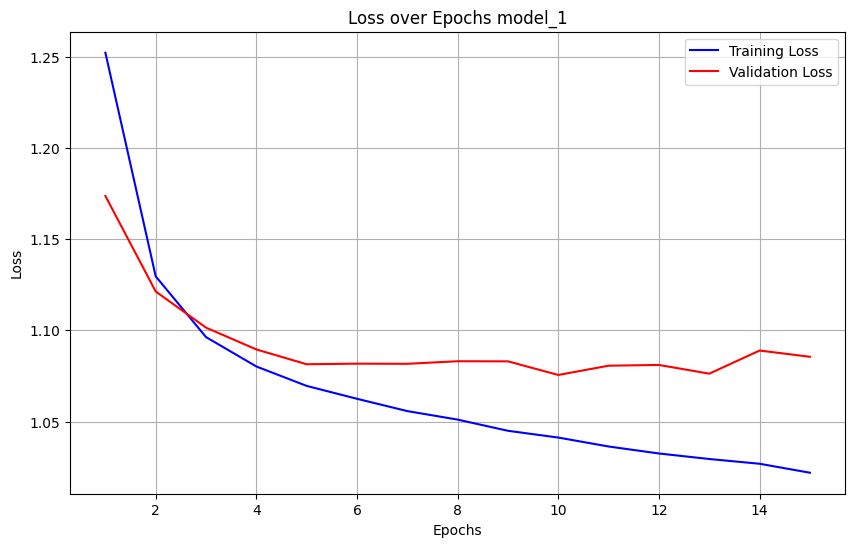

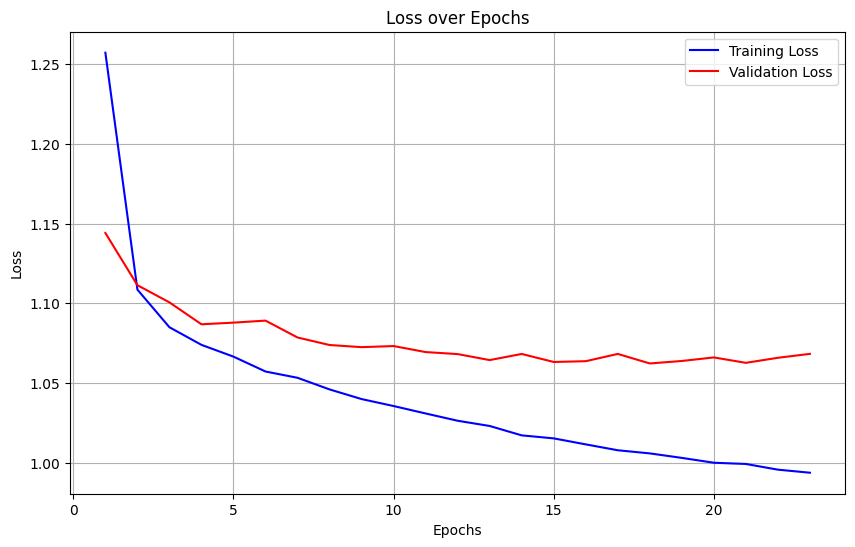

In [22]:
# Extract the loss values from the history object of model_1
train_loss =history.history['loss']
val_loss= history.history['val_loss']
epochs = list(range(1, len(train_loss)+ 1))# X-axis values (epoch numbers)

# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Loss over Epochs model_1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Extract the loss values from the history object of best_model
train_loss =history_best.history['loss']
val_loss= history_best.history['val_loss']
epochs = list(range(1, len(train_loss)+ 1))# X-axis values (epoch numbers)

# Plot the training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [24]:
train_loss =history_best.history['loss']
val_loss= history_best.history['val_loss']
epochs = list(range(1, len(train_loss)+ 1))

In [25]:
trace1=go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='training loss')
trace2=go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='validation loss')

fig = go.Figure()

fig.add_trace(trace1)
fig.add_trace(trace2)

fig.update_layout(title='training and validation loss',
                  xaxis_title='epochs',
                  yaxis_title='loss',
                  template='plotly',
                  plot_bgcolor='lightgrey',
                  paper_bgcolor='lightgrey',
                  width=800,
                  height=600)

fig.show()

The training loss consistently decreases with each epoch, indicating that the model is learning well from the training data.
The validation loss initially decreases but starts to flatten and slightly fluctuates after a few epochs, even increasing a bit toward the end.

There is a clear sign of **overfitting** occurring. This is evident because the training loss continues to decrease while the validation loss stops improving and starts to increase slightly.

**Make Predictions on test.csv**

For both models, use the test.csv data (X_test) to generate predictions for the customer segments.

Convert the softmax output to predicted class labels (A, B, C, or D).


In [26]:
 #Make predictions on X_test_processed using Best practices model(model_1)
predictions_model_1 = model_1.predict(X_test_transformed)
# Make predictions on X_test_processed using best_model (Keras tuning model/model_2)
predictions_model_2 = best_model.predict(X_test_transformed)

# Convert softmax output to predicted class labels (0, 1, 2, 3)
predicted_labels_model_1 = np.argmax(predictions_model_1, axis=1)
predicted_labels_model_2 = np.argmax(predictions_model_2, axis=1)

# Map predicted labels back to their to original classes i.e (A, B, C, D)
class_labels = ['A', 'B', 'C', 'D']
predicted_segments_model_1 = [class_labels[label] for label in predicted_labels_model_1]
predicted_segments_model_2 = [class_labels[label] for label in predicted_labels_model_2]

# Print the predicted labels for model1
print(predicted_labels_model_1)

# Print the predicted labels for model2
print(predicted_labels_model_2)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[0 3 1 ... 0 1 3]
[0 3 1 ... 0 1 3]


In [27]:
# Make predictions
y_pred_model_1 = model_1.predict(X_train_transformed)
y_pred_model_2 = best_model.predict(X_train_transformed)

# Convert softmax output to predicted class labels
y_pred_labels_model_1 = np.argmax(y_pred_model_1, axis=1)
y_pred_labels_model_2 = np.argmax(y_pred_model_2, axis=1)

# Convert one-hot encoded labels to original form
y_train_labels = np.argmax(y_train_transformed, axis=1)

# Generate classification reports
report_model_1 = classification_report(y_train_labels, y_pred_labels_model_1)
report_model_2 = classification_report(y_train_labels, y_pred_labels_model_2)


print(f"Classification Report of best practices model (model_1):\n{report_model_1}")
print(f"Classification Report of keras tuner model (model_2):\n{report_model_2}")

253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report of best practices model (model_1):
              precision    recall  f1-score   support

           0       0.46      0.54      0.50      1972
           1       0.46      0.33      0.39      1858
           2       0.59      0.58      0.59      1970
           3       0.66      0.73      0.69      2268

    accuracy                           0.55      8068
   macro avg       0.54      0.54      0.54      8068
weighted avg       0.55      0.55      0.55      8068

Classification Report of keras tuner model (model_2):
              precision    recall  f1-score   support

           0       0.52      0.43      0.47      1972
           1       0.46      0.41      0.43      1858
           2       0.60      0.59      0.59      1970
           3       0.63      0.80      0.71      2268

    accuracy                           0.57      8068
   macro avg       0.55      0.55      0.55   

**Confusion Matrix**

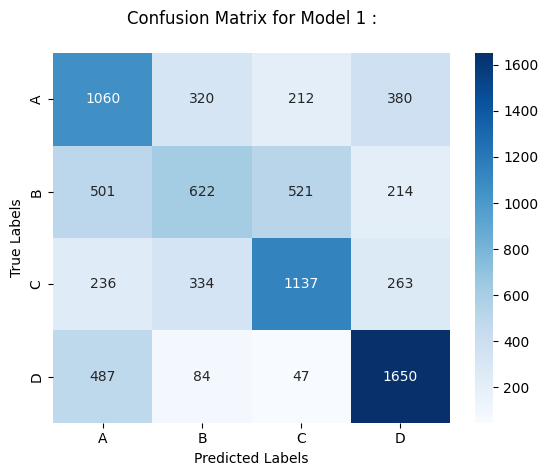

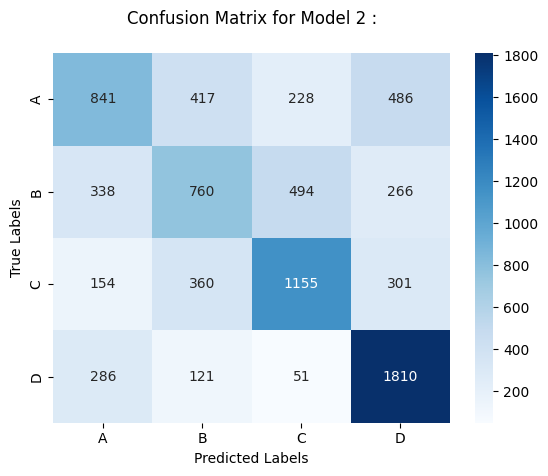

In [28]:
#confusion matrix for model_1 and model_2
import seaborn as sns
cmm_1 = confusion_matrix(y_train_labels, y_pred_labels_model_1)
sns.heatmap(cmm_1, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Model 1 :\n')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

cmm_2 = confusion_matrix(y_train_labels, y_pred_labels_model_2)
sns.heatmap(cmm_2, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix for Model 2 :\n')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**Save Predictions**

In [29]:
# Create a DataFrame with Customer_ID and Predicted_Segment for model 1
df_model_1 = pd.DataFrame({'Customer_ID': test_df['ID'], 'Predicted_Segment': predicted_segments_model_1})

# Create a DataFrame with Customer_ID and Predicted_Segment for model 2
df_model_2 = pd.DataFrame({'Customer_ID': test_df['ID'], 'Predicted_Segment': predicted_segments_model_2})

# Specify the folder path
folder_path = 'drive/My Drive/655_deep_learning'

# Save the predictions for model 1 to a CSV file in the specified folder
df_model_1.to_csv(f'{folder_path}/model_1_predictions_final.csv', index=False)

# Save the predictions for model 2 to a CSV file in the specified folder
df_model_2.to_csv(f'{folder_path}/model_2_predictions_final.csv', index=False)